# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data

The original data came from the cleveland data from UCI Machine learning Repository.

There is also a version of it available on kaggle: https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing tools
We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation



In [3]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# import all the tools we need

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
# svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
# rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)


## Load Data


In [9]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows and columns)

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of you data?


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Let's find how many people have or have not heart disease
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

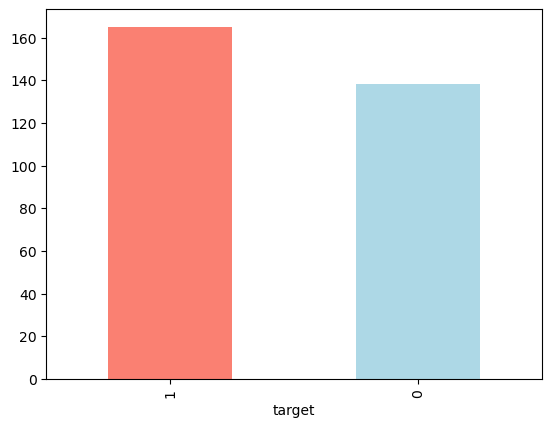

In [12]:
labels = ["Heart Disease Positive", "Heart Disease Negative"]
df["target"].value_counts().plot(kind= "bar", color= ["salmon", "lightblue"]);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe(
    
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [17]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
# Compare target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


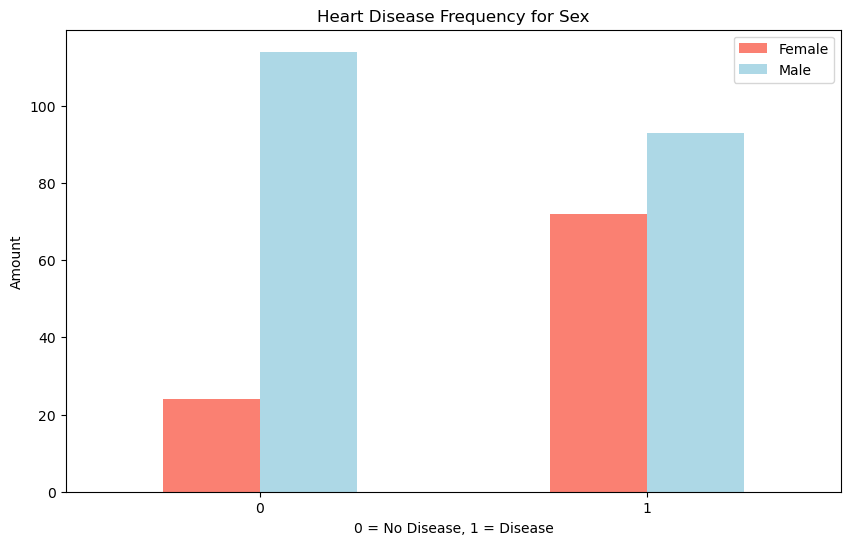

In [20]:
# Create as plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

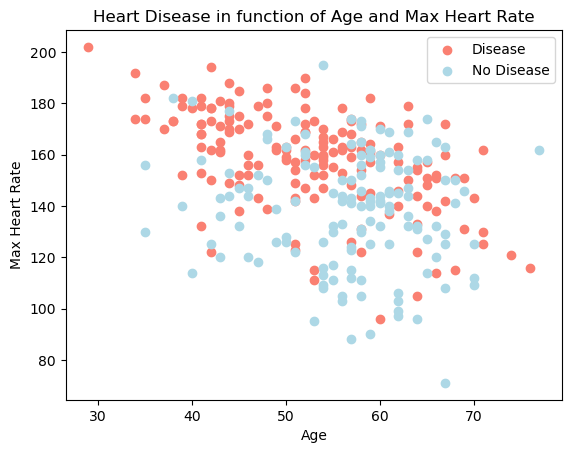

In [21]:
# Scatter with positive example
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue");

# Adding some info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

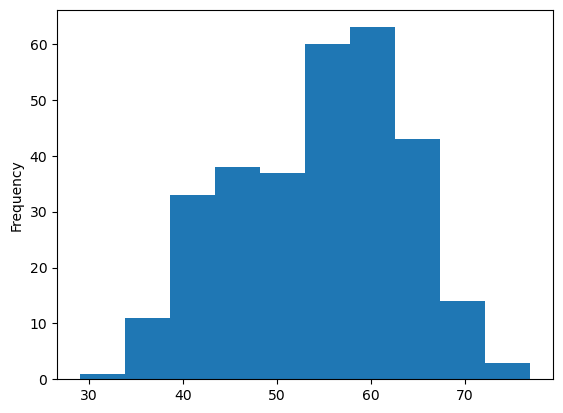

In [22]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();


### Heart Disease Frequency per Chest Pain Type
 cp - chest pain type 
 
*  0: Typical angina: chest pain related decrease blood supply to the heart
*  1: Atypical angina: chest pain not related to heart
*  2: Non-anginal pain: typically esophageal spasms (non heart related)
*  3: Asymptomatic: chest pain not showing signs of disease

In [23]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


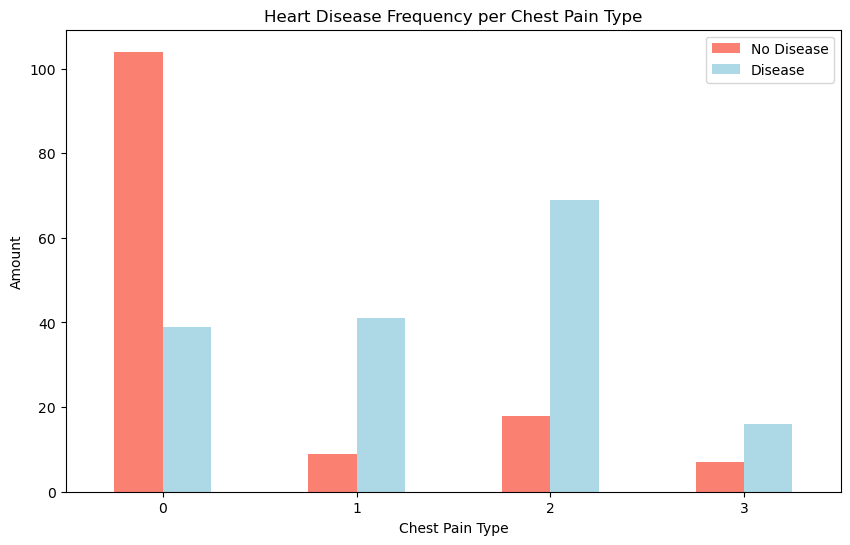

In [38]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

# Adding some info
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


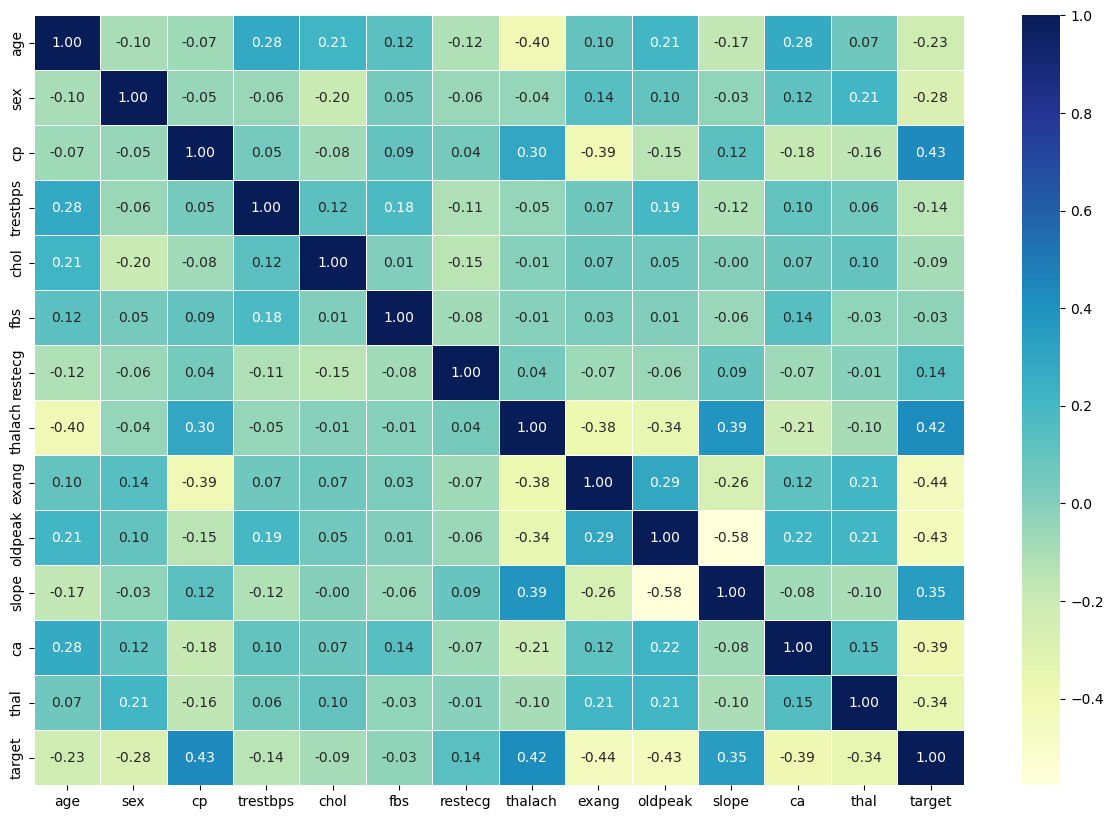

In [42]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth= 0.5,
                fmt = ".2f",
                cmap="YlGnBu");

## 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
 # Split data into X & y(features and labels)
X = df.drop("target", axis =1)
y = df["target"]

In [26]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [28]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

In [29]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [30]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [31]:
y_train.shape, y_test.shape

((242,), (61,))

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it(use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [32]:
# Put models in a dictionary 
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning
    models: a dict of different Scikit-learn machine learning models
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores 

In [33]:
model_scores = fit_and_score(models= models,
                            X_train= X_train,
                            X_test= X_test,
                            y_train= y_train,
                            y_test= y_test)
model_scores

/Users/orbin/Desktop/PROGRAMMING/AI&ML projects/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

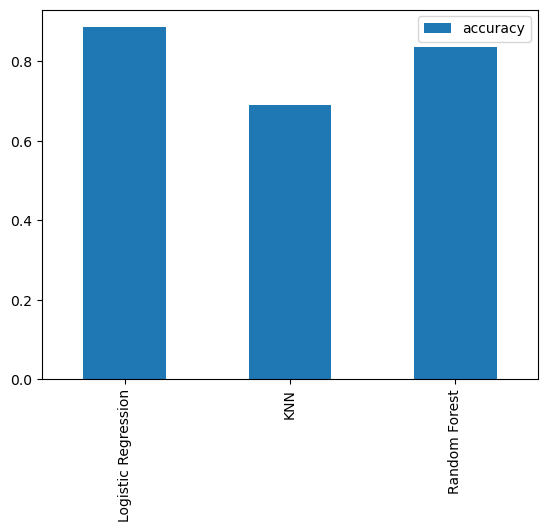

In [34]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should do?

Let's look at the following
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [35]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))



In [36]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data: 75.41% 


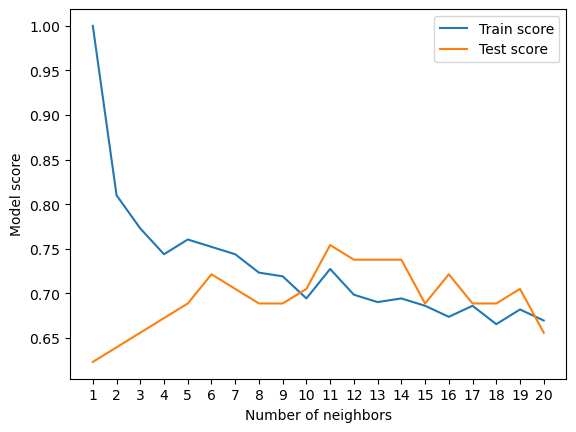

In [40]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}% ")

Hyperparameter tuning with RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomizedForestClassifier()

.... using RandomizedSearchCV

In [43]:
np.logspace(-4, 4, 20),np.arange(10,1000,50)

(array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]))

In [51]:
# Create a hyperparmeter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid  = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 20,2 )}

Now we've got hyperparameters set for each of our models,
let's tune them using RandomizedSearchCV


In [48]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [49]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [52]:
 rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose = True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Tuning LogisticRegression model by GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [54]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose = True)

# Fit the model
gs_log_reg.fit(X_train, y_train )

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [55]:
# Evaluating Grid Search Model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluaiting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC Score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 - score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [63]:
# Make Prediction with tuned model
y_preds = gs_log_reg.predict(X_test)


In [64]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [58]:
y_test


179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

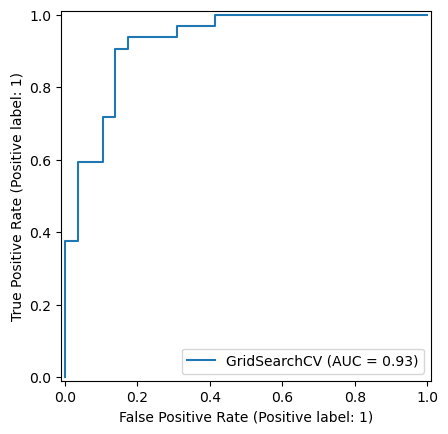

In [71]:
 # Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [73]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


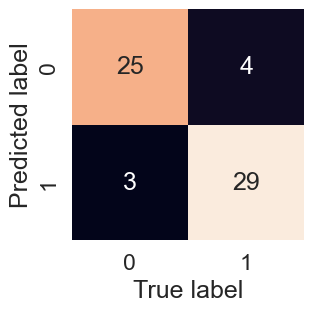

In [76]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")



plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score



In [78]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [79]:
# check the best hyperparameters
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [80]:
clf = LogisticRegression(C=0.20433597178569418, solver= 'liblinear')

In [35]:
# Function for valuating all metrics

metrics = ["accuracy", "precision", "recall", "f1"]
cv_rpt = []
def valuate_metrics(clf, X, y):
    for i in metrics:
        cv_rpt.append(np.mean(cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring=i)))
    print({
        "Accuracy: ": cv_rpt[0],
        "Precision: ": cv_rpt[1],
        "Recall: ": cv_rpt[2],
        "F1 Score: ": cv_rpt[3],
    })
    
        



In [84]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [85]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")

cv_precision 

0.8207936507936507

In [86]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [88]:
# cross-validated f1-score
cv_f1= cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="f1")

cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

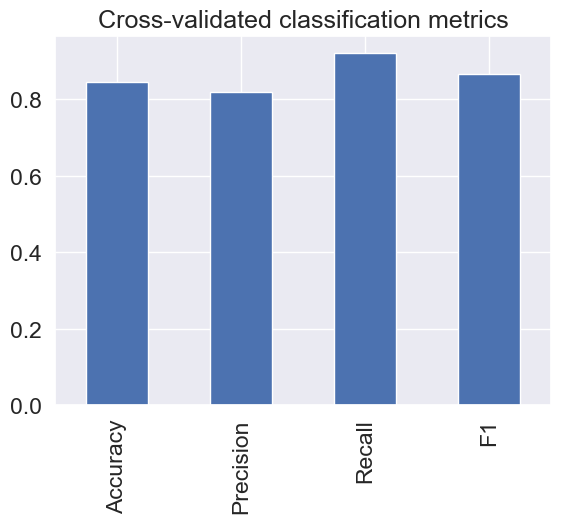

In [90]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend = False);

### Feature Importance

Feature importance is another way of asking, "which feature contributed most to the outcomes of the model and how did they contributed?"

Finding Feature importance is different for each machine learning model. One way to find is to search for "(MODEL NAME)" feature importance

Let's find out the feature importance for our LogisticRegression model...
 

In [91]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [97]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418, solver= 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [98]:
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [112]:
# Match coef's of the features of columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict


,Features,Coeffient
0,age,0.003167
1,sex,-0.860446
2,cp,0.660670
3,trestbps,-0.011570
4,chol,-0.001664
5,fbs,0.043861
6,restecg,0.312758
7,thalach,0.024594
8,exang,-0.604131
9,oldpeak,-0.568628


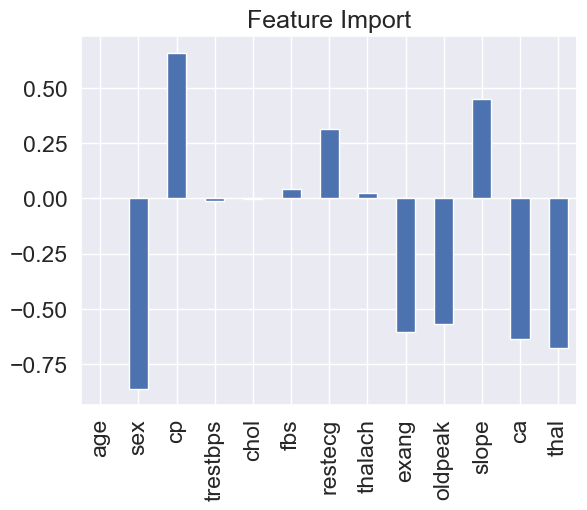

In [121]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Import", legend = False
                     );

In [122]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [123]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6.Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost or Tree Classifier Algorithm
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough(you have hit your evaluation metrics) how you would export it and share it with others

Let us try to predict the same problem with different classifiers and hyperparameter optimization.

New classifiers to look for enhanced evaluation metrics
* CatBoost
* XGBoost
* Tree Classifier

In [130]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 1.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [134]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:

from catboost import CatBoostClassifier
from xgboost import XGBClassifier as xgb
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [15]:
 # Split data into X & y(features and labels)
X = df.drop("target", axis =1)
y = df["target"]

In [16]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [17]:
# Put models in a dictionary 
models = {"CatBoost Classifier": CatBoostClassifier(),
         "XGB Classifier": XGBClassifier(),
         "Decision TreeClassifier": DecisionTreeClassifier(),}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning
    models: a dict of different Scikit-learn machine learning models
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores 

In [140]:
model_scores = fit_and_score(models= models,
                            X_train= X_train,
                            X_test= X_test,
                            y_train= y_train,
                            y_test= y_test)
model_scores;

Learning rate set to 0.005621
0:	learn: 0.6884218	total: 2ms	remaining: 1.99s
1:	learn: 0.6846993	total: 2.77ms	remaining: 1.38s
2:	learn: 0.6804471	total: 3.43ms	remaining: 1.14s
3:	learn: 0.6762242	total: 4.17ms	remaining: 1.04s
4:	learn: 0.6716783	total: 4.79ms	remaining: 953ms
5:	learn: 0.6672808	total: 5.42ms	remaining: 899ms
6:	learn: 0.6639958	total: 6.03ms	remaining: 855ms
7:	learn: 0.6601980	total: 6.57ms	remaining: 814ms
8:	learn: 0.6563767	total: 7.11ms	remaining: 783ms
9:	learn: 0.6525103	total: 7.69ms	remaining: 761ms
10:	learn: 0.6483671	total: 8.3ms	remaining: 746ms
11:	learn: 0.6448827	total: 8.9ms	remaining: 733ms
12:	learn: 0.6412765	total: 9.48ms	remaining: 719ms
13:	learn: 0.6374285	total: 10.1ms	remaining: 709ms
14:	learn: 0.6335427	total: 10.6ms	remaining: 695ms
15:	learn: 0.6288053	total: 11.1ms	remaining: 684ms
16:	learn: 0.6250489	total: 11.7ms	remaining: 677ms
17:	learn: 0.6209496	total: 12.2ms	remaining: 668ms
18:	learn: 0.6181899	total: 12.9ms	remaining: 664

In [149]:
# Different hyperparameters for our CatBoostClassifier model
cat_boost_grid = {"iterations": sp_randInt(10, 100),
               "learning_rate": sp_randFloat(),
                "depth": sp_randInt(4, 10)}

# Setup hyperparameter search for LogisticRegression
gs_cat_boost = RandomizedSearchCV(CatBoostClassifier(),
                         param_distributions= cat_boost_grid,
                         cv=2,
                         n_iter=20,
                         n_jobs=-1,
                         verbose = 0)

# Fit the model
gs_cat_boost.fit(X_train, y_train )

0:	learn: 0.6825394	total: 830us	remaining: 44ms
1:	learn: 0.6704965	total: 1.68ms	remaining: 43.6ms
2:	learn: 0.6602695	total: 2.11ms	remaining: 35.9ms
3:	learn: 0.6535123	total: 2.53ms	remaining: 31.6ms
4:	learn: 0.6462641	total: 3.02ms	remaining: 29.6ms
5:	learn: 0.6386839	total: 3.48ms	remaining: 27.9ms
6:	learn: 0.6303394	total: 4.04ms	remaining: 27.1ms
7:	learn: 0.6199993	total: 4.64ms	remaining: 26.7ms
8:	learn: 0.6144172	total: 5.17ms	remaining: 25.9ms
9:	learn: 0.6070195	total: 5.69ms	remaining: 25ms
10:	learn: 0.5991968	total: 6.15ms	remaining: 24ms
11:	learn: 0.5931608	total: 6.55ms	remaining: 22.9ms
12:	learn: 0.5881927	total: 7.05ms	remaining: 22.2ms
13:	learn: 0.5819478	total: 7.57ms	remaining: 21.6ms
14:	learn: 0.5755278	total: 8.18ms	remaining: 21.3ms
15:	learn: 0.5669642	total: 8.86ms	remaining: 21ms
16:	learn: 0.5600746	total: 9.47ms	remaining: 20.6ms
17:	learn: 0.5550966	total: 9.98ms	remaining: 20ms
18:	learn: 0.5471346	total: 10.2ms	remaining: 18.7ms
19:	learn: 0.5

RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostClassifier object at 0x1119fd6d0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15c8ba600>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1119e41a0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1119e4650>})

In [146]:
# Evaluating Grid Search Model
gs_cat_boost.score(X_test, y_test)

0.8688524590163934

In [82]:
# Different hyperparameters for our CatBoostClassifier model
xg_boost_rs = {'n_estimators': sp_randInt(150, 1000),
              'learning_rate': sp_randFloat(0.01),
              'subsample': sp_randFloat(0.3, 0.9),
              'max_depth': [3],
              'colsample_bytree': sp_randFloat(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4],
              'binary':['logistic'],
              'booster' : ["gblinear"],
               "verbosity":  [0]
             }

# Setup hyperparameter search for LogisticRegression
rs_xg_boost = RandomizedSearchCV(XGBClassifier(objective = 'binary:logistic'), 
                                 param_distributions = xg_boost_rs, 
                                 n_iter = 25, 
                                 error_score = 0, 
                                 verbose = 5,
                                 n_jobs = -1)

# Fit the model
rs_xg_boost.fit(X_train, y_train )

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           lear...
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15c898ef0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15c899f70>,
                                        'max_depth': [3],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15c836d80>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15c898650>,
                                        'verbosity': [0]},
                   verbose=5)

In [78]:
rs_xg_boost.score(X_test, y_test )

0.8524590163934426

In [83]:
rs_xg_boost.best_estimator_

XGBClassifier(base_score=None, binary='logistic', booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7921272469102433, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3764615348713979,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=292, n_jobs=None,
              num_parallel_tree=None, ...)

In [143]:

# A parameter grid for XGBoost
params = { 
    'max_depth':[2],
    'binary':['logistic'],
    'booster' : ["gblinear"],
    'model__max_depth': [3],
    'model__learning_rate': [0.001],
    "model__gamma":[0],
    'model__n_estimators': [100],
    "model__subsample":[0.9],
    "model__colsample_bytree":[0.5],
    "model__early_stopping_rounds": [10], 
    "model__random_state": [1, 42, 58, 69, 72],
    "verbosity":  [0]
    
}

# Setup hyperparameter search for XGBoost Classifier
gs_xg_boost = GridSearchCV(
            estimator = XGBClassifier(),
            param_grid = params,
            scoring = 'roc_auc',
            cv = 5,
            verbose = 0,
            )

# Fit the model
gs_xg_boost.fit(X_train, y_train )



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     random_state=None, ...),
             param_grid={'binary': ['logistic'], 'booster': ['gblinear'],
                         'max_depth': [2], 'model__colsample_bytree': [0.5],
                         'model__early_stopping_rounds': [10],
                         'model__gamma': [0], 'model__learning_rate': [0.001],
                         'model__max_depth': [3], 'model__n_estimators': [100],
                         'model__random_state': [1, 42, 58, 69, 72],
                         'model__subsample': [0.9], 'verbosity': [0]},
             scoring='roc_auc')

In [122]:
gs_xg_boost.best_estimator_

XGBClassifier(base_score=None, binary='logistic', booster='gblinear',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, model__colsample_bytree=0.5,
              model__early_stopping_rounds=10, model__gamma=0,
              model__learning_rate=0.001, model__max_depth=3, ...)

In [156]:
gs_xg_boost.score(X_test, y_test )

0.9213362068965518